Download Abalone dataset (URL: http://archive.ics.uci.edu/ml/datasets/Abalone).

- Load the data from data file.
- Explore the shape of dataset.
- Summarize the properties in the training dataset.
- Check the dataset for any missing values, impute the missing values and also print out the correlation matrix.
- Split data into train, test sets.
- Predict the age of abalone from physical measurements usinglinear regression.
- Plot scatterplot of real data points and regression line.
- Display the coefficients & intercept, accuracy score, Mean Squared Error (MSE) and RMSE.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]
df = pd.read_csv('../data/abalone_data.csv', names=columns)
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole Weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera Weight    4177 non-null float64
Shell Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


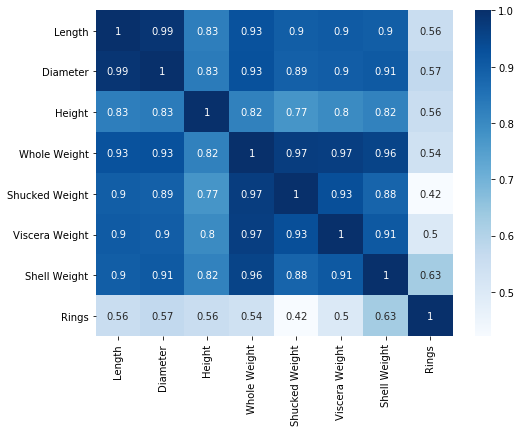

In [5]:
plt.figure(figsize=(8,6))
sb.heatmap(df.corr(), annot=True, cmap='Blues')

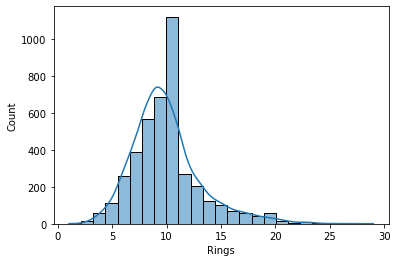

In [6]:
sb.histplot(data=df['Rings'], bins=25, kde=True)

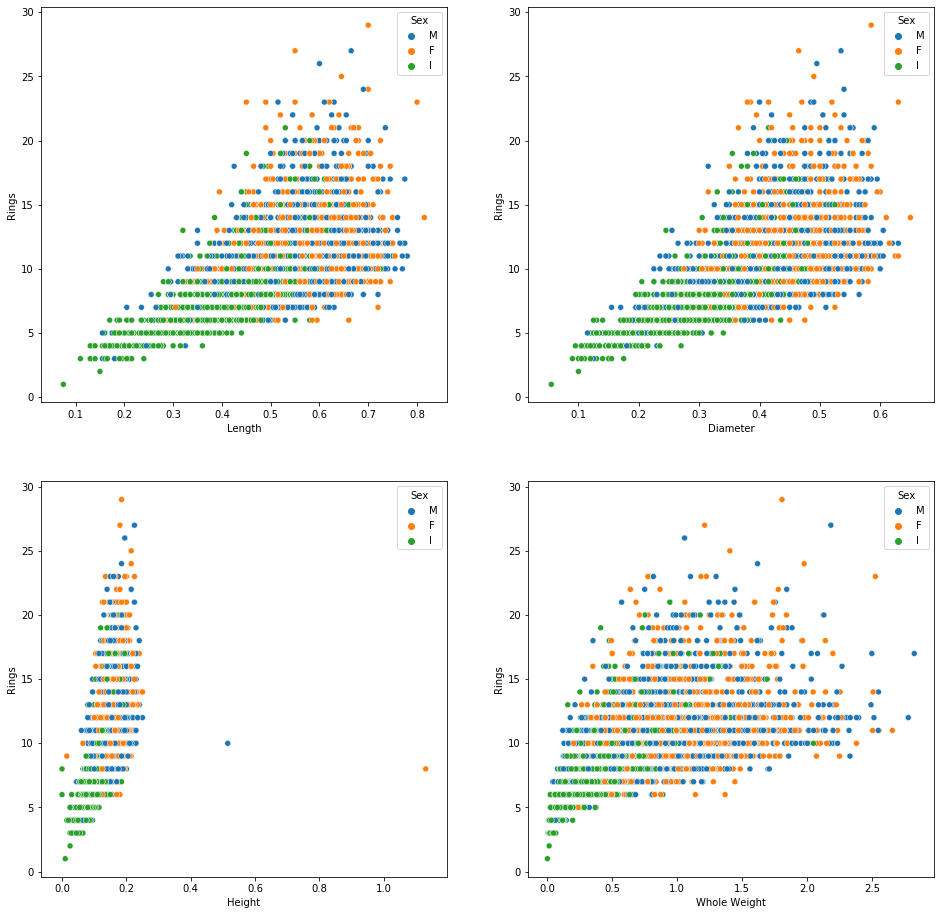

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
sb.scatterplot(x='Length', y='Rings', data=df, hue='Sex', ax=axes[0][0])
sb.scatterplot(x='Diameter', y='Rings', data=df, hue='Sex', ax=axes[0][1])
sb.scatterplot(x='Height', y='Rings', data=df, hue='Sex', ax=axes[1][0])
sb.scatterplot(x='Whole Weight', y='Rings', data=df, hue='Sex', ax=axes[1][1])

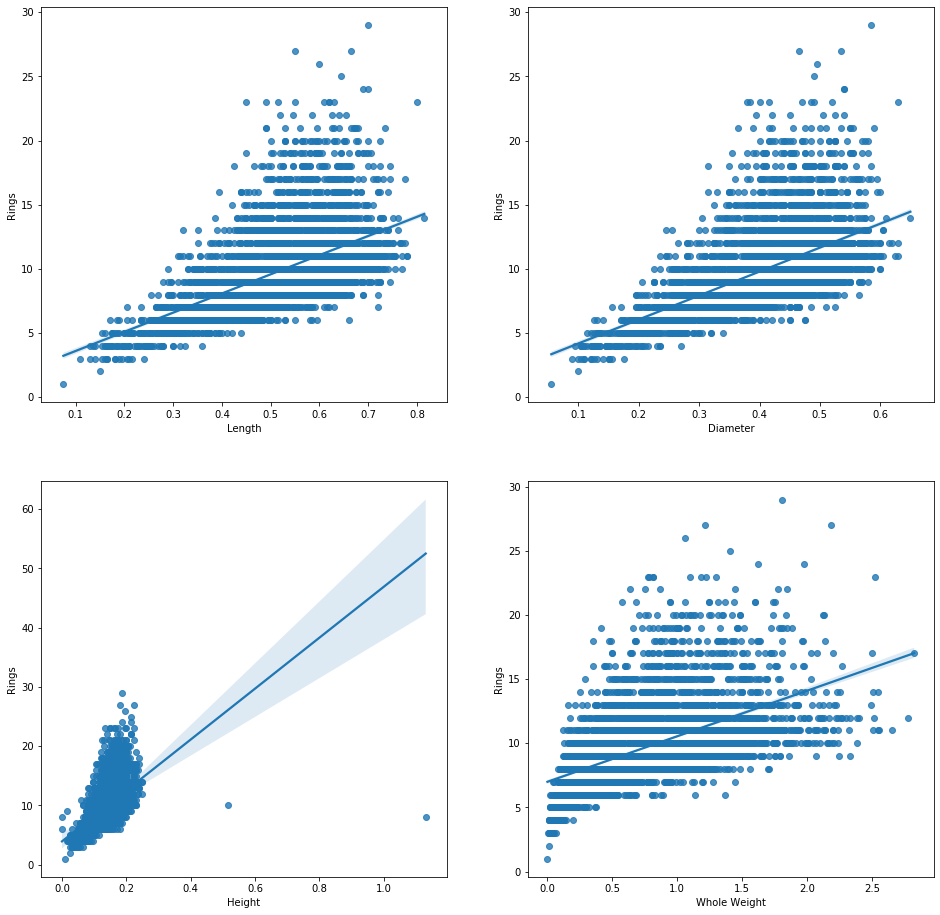

In [8]:
fig,axes = plt.subplots(2,2,figsize=(16,16))
sb.regplot(x='Length',y='Rings',data=df,ax=axes[0][0])
sb.regplot(x='Diameter',y='Rings',data=df,ax=axes[0][1])
sb.regplot(x='Height',y='Rings',data=df,ax=axes[1][0])
sb.regplot(x='Whole Weight',y='Rings',data=df,ax=axes[1][1])

In [9]:
df['M'] = df['Sex'].apply(lambda x:x=='M')
df['F'] = df['Sex'].apply(lambda x:x=='F')
df['I'] = df['Sex'].apply(lambda x:x=='I')
df

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,True,False,False
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,True,False,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,False,True,False
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,True,False,False
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,False,True,False
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,True,False,False
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,True,False,False
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,False,True,False


In [10]:
x = df[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 
        'Shell Weight', 'M', 'F', 'I']]
y = df['Rings']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=73)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
model.score(x_train, y_train)

0.5429919936165981

In [13]:
model.score(x_test, y_test)

0.5220026570462581

In [14]:
test_set_prediction = model.predict(x_test)
residuals = y_test - test_set_prediction

Residual Graph


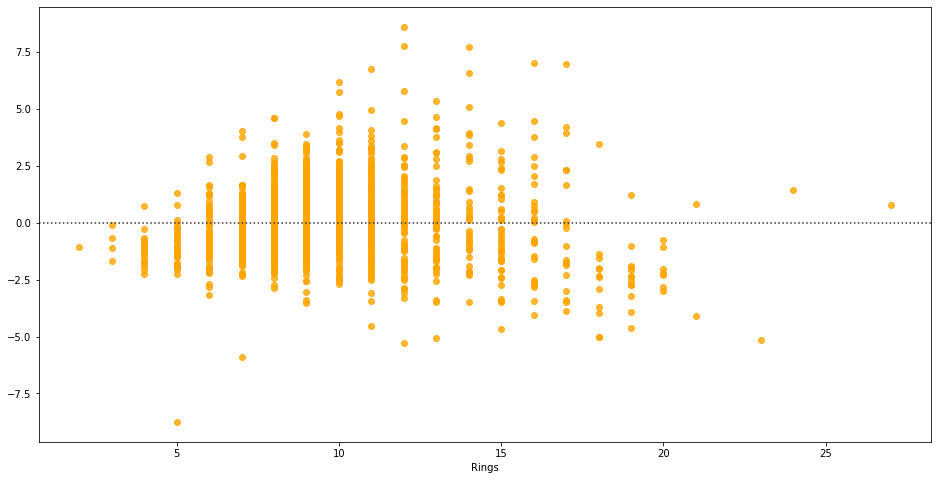

In [15]:
print('Residual Graph')
fig = plt.figure(figsize=(16, 8))
sb.residplot(x=y_test, y=test_set_prediction, color='orange')

In [16]:
print('MAE: ', metrics.mean_absolute_error(y_test, test_set_prediction))

MAE:  1.574062953226976


In [17]:
print('MSE: ', metrics.mean_squared_error(y_test, test_set_prediction))

MSE:  4.5995323175619784


In [18]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, test_set_prediction)))

RMSE:  2.1446520271507867


In [19]:
print('R2 Score: ', metrics.r2_score(y_test, test_set_prediction))

R2 Score:  0.5220026570462581


In [20]:
coeff = pd.DataFrame(data=model.coef_, index=x_train.columns, columns=['Coefficient'])
coeff

,Coefficient
Length,-1.228763e+00
Diameter,1.277806e+01
Height,9.671437e+00
Whole Weight,9.301961e+00
Shucked Weight,-2.047337e+01
Viscera Weight,-1.024402e+01
Shell Weight,9.014542e+00
M,6.827153e+13
F,6.827153e+13
I,6.827153e+13


In [21]:
print('Intercept',model.intercept_)

Intercept -68271533466231.54


Text(0, 0.5, 'test_set_prediction')

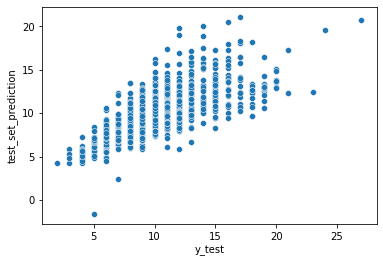

In [24]:
sb.scatterplot(x=y_test, y=test_set_prediction)
plt.xlabel('y_test')
plt.ylabel('test_set_prediction')

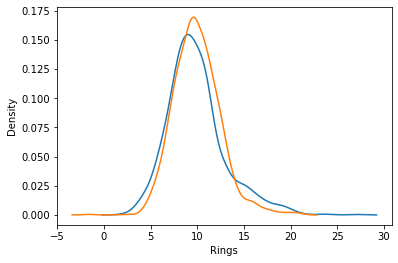

In [25]:
sb.kdeplot(y_test, label='Rings actual')
sb.kdeplot(test_set_prediction, label='Rings Predicted')